In [99]:
# Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import os
import numpy as np

# File load
file1 = os.path.join('csv_exports', 'Shootings.csv' )
file2 = os.path.join('csv_exports', 'Census.csv' )
file3 = os.path.join('csv_exports', 'Combined.csv' )

# File read
shootings_df = pd.read_csv(file1)
census_df = pd.read_csv(file2)
combined_df = pd.read_csv(file3)

In [2]:
shootings_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,abbreviation,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,Washington,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,Oregon,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,Kansas,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,California,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,Colorado,CO,False,attack,Not fleeing,False


In [3]:
# Victim age analysis, excluding 'unknown' output in the age column
filtered_df = shootings_df[shootings_df['age'].str.match('^Unknown') == False]

# Age is an object due to the way unknown values are listed
# Updated age column
filtered_df[['age']] = filtered_df[['age']].astype('float')
filtered_df.dtypes

C:\Users\szerp\Anacoda3\envs\PythonData2\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
abbreviation                object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [6]:
# Identified min and max age
min_age = filtered_df['age'].min()
max_age = filtered_df['age'].max()
print(f'Minimum age: {min_age} \nMaximum age: {max_age}')

Minimum age: 6.0 
Maximum age: 91.0


In [11]:
# Bin Analysis
bins = [0, 9, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 89, 100]

# Categorize age groups
age_groups = ["<10", "10-15", "16-20", "21-25", "26-30",
              "31-35", "36-40", "41-45", "46-50", "51-55", "56-60",
              "61-65", "66-70", "71-75", "76-80", "81-85", "86-89","90+" ]

filtered_df['age groups'] = pd.cut(filtered_df['age'], bins, labels=age_groups, include_lowest=True)

# Count check
age_group_counts = filtered_df['age groups'].value_counts()
age_group_counts

C:\Users\szerp\Anacoda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


31-35    848
26-30    804
21-25    689
36-40    677
41-45    497
46-50    441
16-20    355
51-55    326
56-60    255
61-65    149
66-70     80
71-75     31
76-80     20
10-15     18
81-85     12
86-89      3
<10        2
90+        1
Name: age groups, dtype: int64

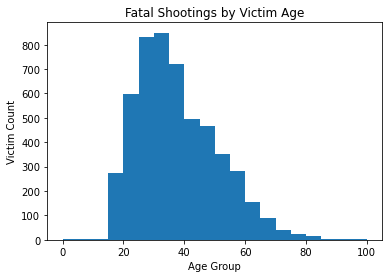

In [31]:
# Age group histogram using prior specified bins
plt.hist(filtered_df['age'], bins=bins)
plt.title('Fatal Shootings by Victim Age')
plt.xlabel('Age Group')
plt.ylabel('Victim Count')
plt.show()

In [52]:
# Analysis of shooting events year by year in the U.S
shootings_df['date'] = pd.to_datetime(shootings_df['date'],format='%Y-%m-%d') 
shootings_df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                                object
gender                             object
race                               object
city                               object
state                              object
abbreviation                       object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object

In [126]:
# Overall shootings per day analysis
yearly_shootings = shootings_df
yearly_shootings['year'] == yearly_shootings['date'].str.extract()
# date_df = pd.DataFrame(yearly_shootings_grp['id'].count())
# date_df = date_df.reset_index()
# date_df = date_df.rename(columns={'id':'id count'})
# date_df

# make column with year, ad group by that new year column
# or month analysis based on month across all years
# name dataframes accordingly - to prevent confusion


,id,name,date,manner_of_death,armed,age,gender,race,city,state,abbreviation,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,Washington,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,Oregon,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,Kansas,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,California,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,Colorado,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,5954,James Tober,2020-06-28,shot,gun,68.0,Male,Unknown,Kettering,Ohio,OH,True,attack,Not fleeing,False
5438,5953,John Parks,2020-06-29,shot,undetermined,57.0,Male,White,Paducah,Kentucky,KY,False,undetermined,Car,False
5439,5958,Wade Russell Meisberger,2020-06-29,shot,gun,48.0,Male,White,Hazleton,Pennsylvania,PA,False,attack,Car,False
5440,5962,Brittany S. Teichroeb,2020-06-29,shot,gun,26.0,Female,White,Midland,Texas,TX,False,other,Other,False


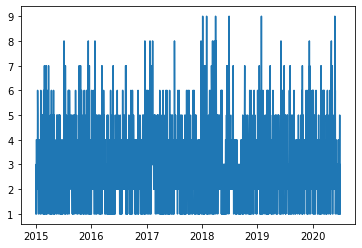

In [128]:
plt.plot(date_df['date'], date_df['id count']) # need to possibly add 3rd item
# multiplot idea for each year - based on month information?
# scatter for date, ID, and year
# coloring information by year
#either year bar chart, or subplot multiplot line - for all years
plt.show()

# plt.bar?
# plt.scatter?
# shootings_df.groupby(lambda x: x.year)['date'].agg(['count'])
# test = shootings_df.groupby(['date'])['id', 'city', 'state']
# test['state'].value_counts()
#test['id'].counts()
# plt.plot(x=shootings_df['city'], y=shootings_d)
# shootings_df.plot(kind='bar', x='state') #value_counts()

In [116]:
# City shooting comparison with population
# This is based on a limited dataset provided from the combined and clean data
# per 100k
state_grp = combined_df.groupby('state')
state_counts = state_grp['id'].count()
state_avg_pop = state_grp['Average'].sum()

In [145]:
#state_df = pd.DataFrame()
combined_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,signs_of_mental_illness,threat_level,flee,body_camera,GEO_ID,2015 Population,2016 Population,2017 Population,2018 Population,Average
0,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,Kansas,...,False,other,Not fleeing,False,1600000US2079000,389955.0,389927.0,390599.0,389259.0,389935.00
1,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,California,...,True,attack,Not fleeing,False,1600000US0667000,864816.0,870887.0,884363.0,883305.0,875842.75
2,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,Male,Hispanic,Chandler,Arizona,...,False,attack,Car,False,1600000US0412000,260833.0,247459.0,253448.0,257153.0,254723.25
3,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,Male,White,Stockton,California,...,False,attack,Not fleeing,False,1600000US0675000,305650.0,307057.0,310476.0,311189.0,308593.00
4,22,Hashim Hanif Ibn Abdul-Rasheed,2015-01-07,shot,knife,41.0,Male,Black,Columbus,Ohio,...,True,other,Not fleeing,False,1600000US3918000,849067.0,862643.0,881901.0,895877.0,872372.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,5956,Benjamin Paul Brooks,2020-06-26,shot,gun,38.0,Male,White,Muncie,Indiana,...,False,attack,Car,False,1600000US1851876,69701.0,68707.0,68450.0,70178.0,69259.00
2455,5963,Leonardo Hurtado Ibarra,2020-06-27,shot,gun,25.0,Male,Hispanic,San Diego,California,...,False,attack,Foot,True,1600000US0666000,1394907.0,1406622.0,1419488.0,1425999.0,1411754.00
2456,5951,Aloysius Keaton,2020-06-27,shot and Tasered,knife,58.0,Male,Unknown,Little Rock,Arkansas,...,False,attack,Other,False,1600000US0541000,197986.0,198546.0,198594.0,197868.0,198248.50
2457,5962,Brittany S. Teichroeb,2020-06-29,shot,gun,26.0,Female,White,Midland,Texas,...,False,other,Other,False,1600000US4848072,132950.0,134613.0,136090.0,142339.0,136498.00


In [175]:
#shootings_df.loc[shootings_df['city', 'state']].unique()

# city = shootings_df['city'].unique().tolist()
# len(city)
# 2481 unique cities

state_grp = combined_df.groupby(['city','state'])
state_city_count_s = state_grp['id'].count()
state_city_count_df = pd.DataFrame({'Lethal Shooting Count:': state_city_count_s})
state_city_count_df = state_city_count_df.reset_index()
state_city_count_df

# Merge city population data into the DF
state_city_count_df = pd.merge(state_city_count_df, combined_df[['city', 'state', 'Average']], on=('city', 'state'), how='left')
state_city_count_df = state_city_count_df.drop_duplicates()
state_city_count_df['Per Capita'] = (state_city_count_df['Lethal Shooting Count:']/
                                     state_city_count_df['Average'])*100000


state_city_count_df = state_city_count_df[['state', 'city', 'Lethal Shooting Count:', 'Average', 'Per Capita']]
state_city_count_df


,state,city,Lethal Shooting Count:,Average,Per Capita
0,Texas,Abilene,3,125727.00,2.386122
3,Ohio,Akron,7,197765.25,3.539550
10,Georgia,Albany,1,72313.00,1.382877
11,New York,Albany,1,98020.75,1.020192
12,New Mexico,Albuquerque,35,559298.25,6.257842
...,...,...,...,...,...
2446,Washington,Yakima,4,93804.25,4.264199
2450,New York,Yonkers,2,200891.00,0.995565
2452,California,Yorba Linda,1,68060.00,1.469292
2453,California,Yuba City,2,66910.25,2.989079


In [171]:
combined_df.loc[combined_df['city'] == 'Abilene']

# total_city = state_grp["city"].value_counts(dropna=False)
# total_city
# # city_df = pd.DataFrame({
#     "Total Fatal Shooting Deaths": total_city})


# City shootings per Capita
# shootings_df['Per Capita'] = (shootings_df['Average']) * 10000

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,signs_of_mental_illness,threat_level,flee,body_camera,GEO_ID,2015 Population,2016 Population,2017 Population,2018 Population,Average
1102,2660,Emmett Edward Hall,2017-06-10,shot,knife,60.0,Male,White,Abilene,Texas,...,True,other,Not fleeing,False,1600000US4801000,125876.0,128272.0,123304.0,125456.0,125727.0
1441,3522,Michael Leroy McGinnis,2018-03-23,shot,gun,29.0,Male,White,Abilene,Texas,...,False,attack,Not fleeing,False,1600000US4801000,125876.0,128272.0,123304.0,125456.0,125727.0
2330,5652,Lebarron Ballard,2020-03-18,shot and Tasered,knife,28.0,Male,Black,Abilene,Texas,...,False,attack,Foot,False,1600000US4801000,125876.0,128272.0,123304.0,125456.0,125727.0
